# Project: Predict Movie Box Office


Data for this case:   
        
        moviebuzz.csv 



In [66]:
# Data Imports
import numpy as np
import pandas as pd

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
#from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

## Exploratory Data Analysis (EDA)
    
Let us go ahead and take a look at the dataset

In [3]:
df = pd.read_csv('moviebuzz.csv')

In [4]:
df.head()

,Box,Rating,Budget,StarPower,Sequel,Action,Comedy,Animated,Horror,Fandango,HSX,Movie
0,63106589.0,2,150.0,42.51,1,0,0,1,0,0.79,143.03,Madagascar 2
1,69637740.0,3,37.0,16.75,0,0,0,0,0,0.77,128.01,Twilight
2,67528882.0,3,200.0,28.08,1,1,0,0,0,0.76,163.91,Quantum of Solace
3,70950500.0,3,85.0,16.62,1,1,0,0,0,0.71,105.91,Fast and Furious
4,14851136.0,3,55.0,23.61,0,0,0,0,0,0.70,84.16,Seven Pounds


### Exercise 1. Visualize the data

Reminder: our target is to predict box office.

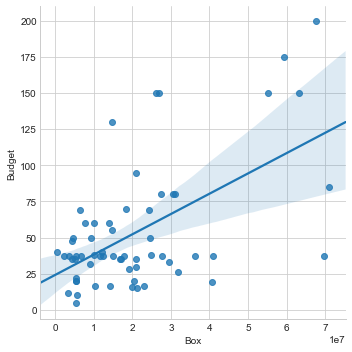

In [73]:
# Your code
sns.lmplot('Box','Budget',data=df)
#You would think that the more money you spend on making a movie, the better it will perform
#at the Box office. There seems to be a relationship, however it is hard to tell with certainty since variability 
# of "Box" increases as "Budgets" increase. Possible heteroskedasticity?

  
 
# Prepare dataset

In [51]:
X = df.drop(['Box', 'Movie'], axis = 1)

X.head()

,Rating,Budget,StarPower,Sequel,Action,Comedy,Animated,Horror,Fandango,HSX
0,2,150.0,42.51,1,0,0,1,0,0.79,143.03
1,3,37.0,16.75,0,0,0,0,0,0.77,128.01
2,3,200.0,28.08,1,1,0,0,0,0.76,163.91
3,3,85.0,16.62,1,1,0,0,0,0.71,105.91
4,3,55.0,23.61,0,0,0,0,0,0.70,84.16


In [50]:
Y = df['Box']

Y.head()

0    63106589.0
1    69637740.0
2    67528882.0
3    70950500.0
4    14851136.0
Name: Box, dtype: float64

# Using scikit learn to implement a multivariate linear regression

Hint: https://github.com/MIS6300-2017Fall/python-machine-learning/blob/master/1.1%20-%20Linear%20Regression%20Example%20(short%20version).ipynb

### Exercise 2. Implement a multivariate linear regression

You need to:

1. Split the data into training/testing sets
2. Create linear regression object
3. Train the model using the training sets
4. Make predictions using the testing set
5. Report coefficients, mean squared error(MSE) and variance score(R-square). 

In [74]:
# Your code
#Spliting the data into training/testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

#Creating a Linear Regression Object
lreg = LinearRegression()

#Training the model using the training sets
lreg.fit(X_train, Y_train)

#Predictions on test set
pred_test = lreg.predict(X_test)

#Coefficient Report
coeff_df = pd.DataFrame(df.columns)
coeff_df.columns = ['Movie']
coeff_df["Coefficient Estimate"] = pd.Series(lreg.coef_)
print(coeff_df)

#Mean squared error
print("\nMean squared error: %.2f"
      % mean_squared_error(Y_test, pred_test))
#R2
print('Variance score: %.2f' % r2_score(Y_test, pred_test))

        Movie  Coefficient Estimate
0         Box         -5.829318e+05
1      Rating         -1.474459e+04
2      Budget         -1.836539e+05
3   StarPower          8.235167e+06
4      Sequel         -7.090736e+06
5      Action          8.069517e+05
6      Comedy         -6.017147e+06
7    Animated          4.836393e+06
8      Horror          1.664350e+07
9    Fandango          3.732232e+05
10        HSX                   NaN
11      Movie                   NaN

Mean squared error: 119772924787583.44
Variance score: 0.52
